# **Less Images**

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=6bf5f68a7a37f4ea06653b84731ec9815a840f96863bb8a193e8dccdf105ee01
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import cv2
import numpy as np
import os
import face_recognition
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((img, filename))
    return images

def encode_faces(images):
    encodings = []
    for img, filename in images:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        boxes = face_recognition.face_locations(rgb_img, model='cnn')  # Using 'cnn' model for better accuracy
        encodings.append((face_recognition.face_encodings(rgb_img, boxes), filename))
    return encodings

def find_matching_images(query_image_path, image_folder, tolerance=0.4):  # Adjust tolerance for accuracy
    query_image = cv2.imread(query_image_path)
    query_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    query_boxes = face_recognition.face_locations(query_rgb, model='cnn')
    query_encoding = face_recognition.face_encodings(query_rgb, query_boxes)[0]

    images = load_images_from_folder(image_folder)
    encodings = encode_faces(images)

    matching_images = []

    for face_encodings, filename in encodings:
        for face_encoding in face_encodings:
            match = face_recognition.compare_faces([query_encoding], face_encoding, tolerance=tolerance)
            if match[0]:
                matching_images.append((filename, face_encoding))

    return matching_images

def display_matching_images(matching_images, image_folder):
    for filename, _ in matching_images:
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
        plt.title(filename)
        plt.axis('off')
        plt.show()

# Example usage
query_image_path = "/content/drive/MyDrive/Data/imgs/1719474511080.jpg"
image_folder = "/content/drive/MyDrive/Data/imgs"

matching_images = find_matching_images(query_image_path, image_folder, tolerance=0.4)  # Adjust tolerance for accuracy
print("Matching images:", [filename for filename, _ in matching_images])

# Display the matching images
display_matching_images(matching_images, image_folder)


In [ ]:
print(len(matching_images))

1


# **Medium Images**

In [ ]:
pip install face_recognition opencv-python numpy


In [ ]:
#More Accuracy

import cv2
import numpy as np
import os
import face_recognition
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((img, filename))
    return images

def encode_faces(images):
    encodings = []
    for img, filename in images:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        boxes = face_recognition.face_locations(rgb_img, model='cnn')  # Using 'cnn' model for better accuracy
        encodings.append((face_recognition.face_encodings(rgb_img, boxes), filename))
    return encodings

def find_matching_images(query_image_path, image_folder, tolerance=0.4):  # Adjust tolerance for accuracy
    query_image = cv2.imread(query_image_path)
    query_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    query_boxes = face_recognition.face_locations(query_rgb, model='cnn')
    query_encoding = face_recognition.face_encodings(query_rgb, query_boxes)[0]

    images = load_images_from_folder(image_folder)
    encodings = encode_faces(images)

    matching_images = []

    for face_encodings, filename in encodings:
        for face_encoding in face_encodings:
            match = face_recognition.compare_faces([query_encoding], face_encoding, tolerance=tolerance)
            if match[0]:
                matching_images.append((filename, face_encoding))

    return matching_images

def display_matching_images(matching_images, image_folder):
    for filename, _ in matching_images:
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
        plt.title(filename)
        plt.axis('off')
        plt.show()

def save_matching_images(matching_images, image_folder, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for filename, _ in matching_images:
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        save_path = os.path.join(save_folder, filename)
        cv2.imwrite(save_path, img)
        #print(f"Saved {filename} to {save_folder}")

# Example usage
query_image_path = "/content/drive/MyDrive/Data/imgs/1719474511050.jpg" #Enter the query image that you want to extract from the large source
image_folder = "/content/drive/MyDrive/Data/imgs"

matching_images = find_matching_images(query_image_path, image_folder, tolerance=0.4)  # Adjust tolerance for accuracy
print("Matching images:", [filename for filename, _ in matching_images])

# Display the matching images
display_matching_images(matching_images, image_folder)

save_folder = input("Enter the name of the folder to save the matched images: ")
save_folder_path = os.path.join("/content/drive/MyDrive/Data", save_folder)

# Save the matched images
save_matching_images(matching_images, image_folder, save_folder_path)
print("Folder Created!😉")

# **All Images**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Matching images: ['1719474510957.jpg', '1719474510963.jpg', '1719474510963.jpg', '1719474510971.jpg', '1719474510977.jpg', '1719474510982.jpg', '1719474511007.jpg', '1719474511019.jpg', '1719474511025.jpg', '1719474511034.jpg', '1719474511050.jpg', '1719474511057.jpg', '1719474511064.jpg', '1719474511071.jpg', '1719474511080.jpg', '1719474511095.jpg', '1719476612354.jpg', '1719476612363.jpg', '1719476612363.jpg', '1719476612370.jpg', '1719476612375.jpg', '1719476997684.jpg']


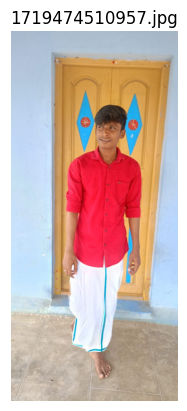

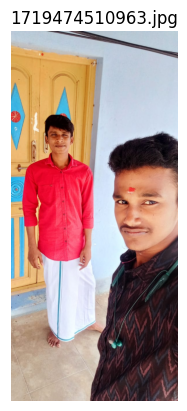

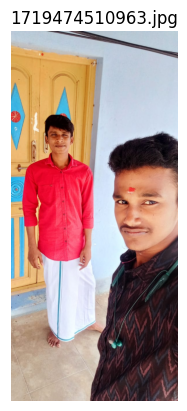

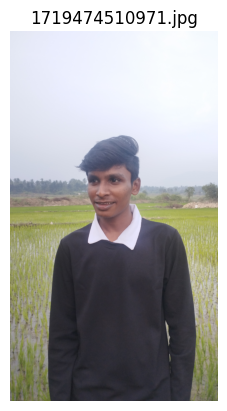

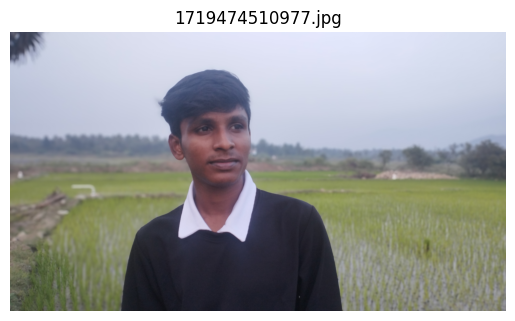

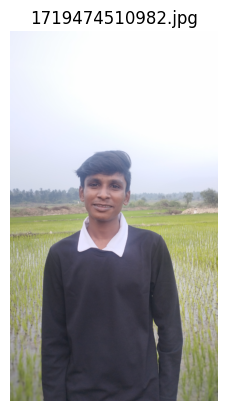

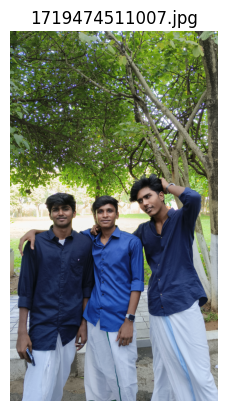

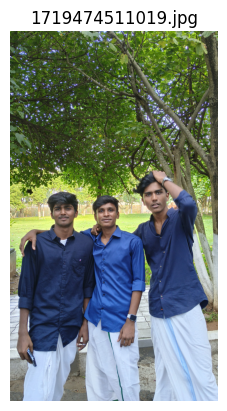

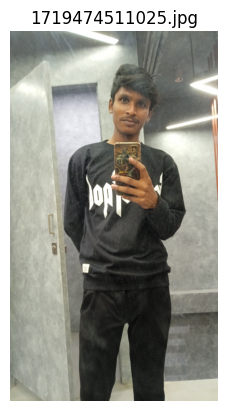

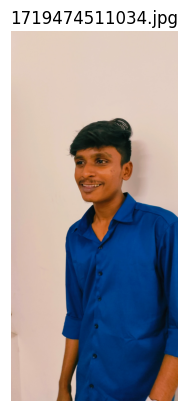

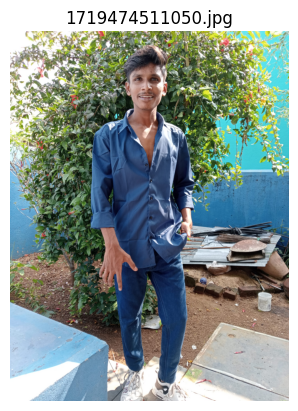

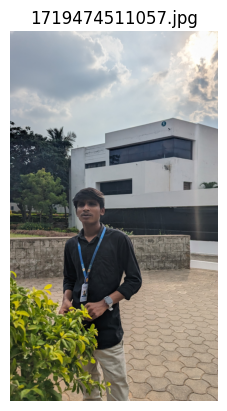

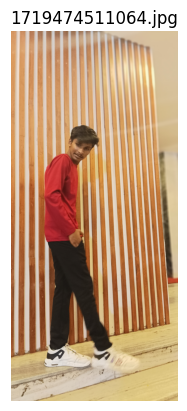

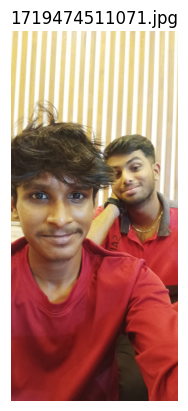

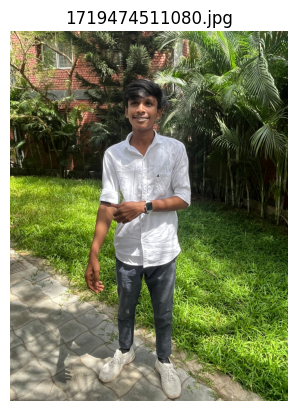

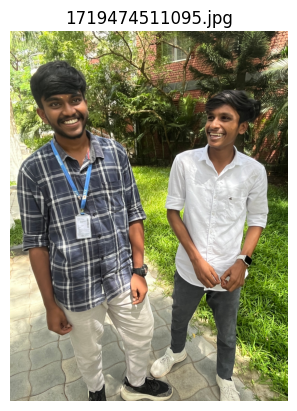

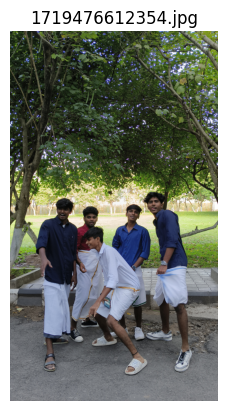

In [ ]:


import cv2
import numpy as np
import os
import face_recognition
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((img, filename))
    return images

def encode_faces(images):
    encodings = []
    for img, filename in images:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        boxes = face_recognition.face_locations(rgb_img, model='hog')  # Using 'hog' model for faster processing
        if boxes:  # Check if faces are detected
            encodings.append((face_recognition.face_encodings(rgb_img, boxes), filename))
    return encodings

def find_matching_images(query_image_path, image_folder, tolerance=0.6):  # Increased tolerance for less strict matching
    query_image = cv2.imread(query_image_path)
    query_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    query_boxes = face_recognition.face_locations(query_rgb, model='hog')
    if not query_boxes:
        print("No face found in the query image.")
        return []
    query_encoding = face_recognition.face_encodings(query_rgb, query_boxes)[0]

    images = load_images_from_folder(image_folder)
    encodings = encode_faces(images)

    matching_images = []

    for face_encodings, filename in encodings:
        for face_encoding in face_encodings:
            match = face_recognition.compare_faces([query_encoding], face_encoding, tolerance=tolerance)
            if match[0]:
                matching_images.append((filename, face_encoding))

    return matching_images

def display_matching_images(matching_images, image_folder):
    for filename, _ in matching_images:
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
        plt.title(filename)
        plt.axis('off')
        plt.show()

def save_matching_images(matching_images, image_folder, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for filename, _ in matching_images:
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        save_path = os.path.join(save_folder, filename)
        cv2.imwrite(save_path, img)
        #print(f"Saved {filename} to {save_folder}")

# Example usage
query_image_path = "/content/drive/MyDrive/Data/imgs/1719474511050.jpg"
image_folder = "/content/drive/MyDrive/Data/imgs"

matching_images = find_matching_images(query_image_path, image_folder, tolerance=0.6)  # Increased tolerance for less strict matching
print("Matching images:", [filename for filename, _ in matching_images])

# Display the matching images
display_matching_images(matching_images, image_folder)
save_folder = input("Enter the name of the folder to save the matched images: ")
save_folder_path = os.path.join("/content/drive/MyDrive/Data", save_folder)

# Save the matched images
save_matching_images(matching_images, image_folder, save_folder_path)
print("Folder Created!😉")
